# **Construindo um modelo de Machine Learning para Análise de Sentimentos em PT-BR**
Pollyanna Gonçalves

### **Análise de Sentimentos (Sentiment Analysis)**

Um dos maiores desafios da Inteligência Artificial é a análise e compreensão de textos escritos por humanos. Isso porque as máquinas ainda possuem dificuldades no entendimento de contextos, subjetividade, opiniões, ironias e etc, bastante presente em nossa forma de comunicação.

![alt text](https://i.pinimg.com/originals/9d/fa/22/9dfa22538c7ecb71effb3486f50af186.jpg)

"*Análise de sentimento, também conhecida como mineração de opinião, é o
campo de estudo que analisa as opiniões, sentimentos, avaliações, atitudes
e emoções das pessoas em relação a entidades como produtos, serviços,
organizações, indivíduos, eventos e seus aspectos*" (LIU, 2012)

Técnicas de análise englobam desde o uso de [escalas psicométricas](https://pt.wikipedia.org/wiki/Psicometria_(psicologia)) (vem sendo criadas pela Psicologia há várias décadas) a Inteligência Artificial. E o aumento da procura por esses métodos vêm surgindo em razão da maior disponibilidade de dados e das oportunidades que o mercado oferece.

![Busca pelo termo "sentiment analysis" no Google desde 2004](https://brand24.com/blog/wp-content/uploads/2018/02/Screen-Shot-2018-02-09-at-13.14.56.png)




### **Aprendizado de Máquina (Machine Learning)**

"*O aprendizado de máquina (em inglês, machine learning) é um método de análise de dados que automatiza a construção de modelos analíticos. É um ramo da inteligência artificial baseado na ideia de que sistemas podem aprender com dados, identificar padrões e tomar decisões com o mínimo de intervenção humana.*" ([SaS](https://www.sas.com/pt_br/insights/analytics/machine-learning.html))

Existem várias técnicas de ML, cada uma delas envolvendo  metodologias estatísticas e algoritmos variados, para serem utilizadas como soluções de diversos problemas:

![alt text](https://qph.fs.quoracdn.net/main-qimg-632a7e5959c0fee71a85e3e5ccef96c3)

**Hoje vamos focar na construção de um modelo de Machine Learning supervisionado para classificar sentimentos Positivo ou Negativo em reviews de filmes. Por se tratar de um modelo supervisionado, precisaremos treinar nosso modelo com dados existentes.**

# **Mão na massa!**

### **Dataset**

Para treinar e testar nosso modelo, vamos utilizar um de seus datasets com cerca de 50 mil revisões de filmes, traduzidas para PT-BR (Portugês Brasileiro) pelo [Luís Fred](https://github.com/luisfredgs/sentiment-analysis-keras-lstm/tree/master/dataset), desenvolvedor brasileiro.

O [IMDb](https://www.imdb.com/), também conhecida como *Internet Movie Database*, é uma plataforma onde pessoas do mundo inteiro compartilham informação sobre música, cinema, filmes e jogos de computador. Seus dados são utilizados mundialmente pela comunidade de ML para a criação de modelos de classificação de textos.

***1- Baixe o arquivo CSV via***: [bit.ly/...](bit.ly/...)

***2- Faça upload do arquivo na pasta raíz do seu Google Drive*** (OBS.: Você precisará de um e-mail do Gmail para ter acesso ao Google Drive e Google Colab) ([drive.google.com/drive/my-drive](https://drive.google.com/drive/my-drive))

***3- Lembre/Copie ou Salve o caminho do seu arquivo*** (drive.google.com/drive/my-drive/dataset/imdb_reviews_ptbr.csv)


### **Let's start coding!**

Iremos utilizar Python como linguagem de programação para importar nossos dados, criar, treinar e testar o modelo de classificação de sentimentos. Bibliotecas (ou *libraries*) em Python são coleções de módulos de scripts que simplificam o processo de programação e removem a necessidade de reescrever os comandos e/ou algoritmos muito utilizados.

> Note que, a partir de agora iremos criar células de código, já que até o momento estávamos apenas introduzindo o tema utilizando as células de texto (também chamadas de *markdown*).

**OBS**.: *Em Python, o símbolo "#" precede uma linha de comentário. Ou seja, essas linhas não serão reconhecidas como um código a ser executado.*

**Vamos importar as bibliotecas que serão necessárias para nosso problema:**

In [1]:
#Importando biblioteca Pandas, muito utilizada para lidar com tabelas de dados
import pandas as pd 

#Importando biblioteca NumPy, que possui várias implementações mais performáticas de cálculos matemáticos 
import numpy as np

#Importanto biblioteca matplotlib para gráficos
import matplotlib.pyplot as plt 

#Importando bibliotecas IO, e auxiliares do Google Colab para facilitar a importação do nosso dataset
import io
from google.colab import drive
# from google.colab import files

**Primeiramente, vamos preparar o Google Colab para importar nosso dataset que está no Google Drive. Para isso, vamos executar o código abaixo:**

In [2]:
#Fazendo Google Colab "enxergar" nosso diretório do Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Agora vamos importar nosso dataset de revisões!**

In [3]:
#Utilizando a função read_csv da biblioteca Pandas para importar nosso arquivo
df = pd.read_csv('/content/gdrive/My Drive/imdb_reviews_ptbr.csv', sep=',')

#Vamos printar algumas linhas do arquivo
df.head() 

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


### **Análise Exploratória de Dados**

Antes de começar a construir nosso modelo, vamos explorar nossos dados. Essa é uma etapa importante no pipeline de Machine Learning, e é comumente chamada de **EDA (Exploratory Data Analysis)**. Nessa etapa, buscamos entender nossos dados e corrigir possíveis problemas como:

*   **Linhas com registros faltantes**: A maioria dos algoritmos de ML não funcionam com registros vazios. Técnicas:
  *   Remoção dos registros
  *   Média/Mediana/Desvio padrão dos dados existentes
  *   Modelo ML para prever dado
*   **Desbalanceamento de classes**: Se nossos dados estão enviesados para alguma classe, esse viés será repercutido no modelo final, levando a uma performance pior do que a esperada. Técnicas:
  *   *Oversampling*
  *   *Undersampling*
  *   *Class-weigth*
*   **Distribuição dos dados numéricos**: Para modelos baseados em estatística, lidar com dados normalizados ajuda o modelo a identificar melhor os padrões nos dados. Técnicas:
  *   *Log*
  *   *Z-score*
  *   *Clipping*
*   **Identificação de outliers**: Podem prejudicar a performance do modelo. Técnicas:
  *   Remoção
  *   *IQR Score*
  *   *Winsorize*
*   Etc.



**Identificando dados faltantes:** vamos identificar se existem registros vazios no nosso dataset:


In [4]:
df.isnull().values.any()

False

Com o retorno *False* podemos concluir que não existem registros nulos.

**Identificando desbalanceamento:** vamos calcular a quantidade de registros positivos e negativos (que são nossas classes) nos dados:


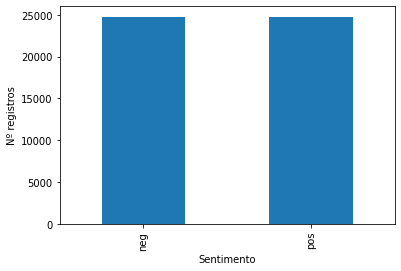

In [5]:
df.sentiment.value_counts().plot.bar()
plt.xlabel('Sentimento')
plt.ylabel('Nº registros')
plt.show()

Legal! Nossos dados estão praticamente equilibrados, com cerca de 50% de registros para cada classe.

**Identificando palavras mais frequentes em cada classe:**

Uma outra etapa interessante em análises textuais é visualizarmos as palavras mais frequentes nos nossos dados. Com isso podemos começar a identificar alguns padrões que nosso modelo de ML provavelmente também utilizará para a classificação. 

Para visualizar, vamos importar a biblioteca WordCloud e criar uma função auxiliar para gerar uma nuvem de palavras:

In [6]:
from wordcloud import WordCloud

def create_wordcloud(reviews):
  wordcloud = WordCloud(width = 3000,height = 2000,background_color = 'white').generate(str(reviews))
  fig = plt.figure(figsize = (8, 6))
  plt.imshow(wordcloud, interpolation = 'bilinear')
  plt.axis('off')
  plt.tight_layout(pad=0)
  plt.show()

Vamos começar pelas revisões **positivas**:

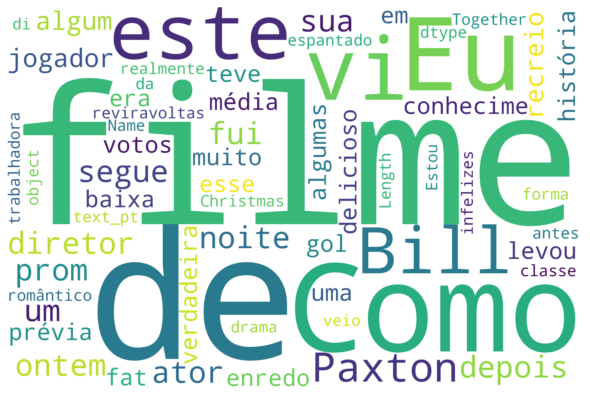

In [7]:
df_pos = df.loc[df['sentiment'] == 'pos']['text_pt']

#Chamando a função de criação da nuvem de palavras
create_wordcloud(df_pos)

E as revisões **negativas**:

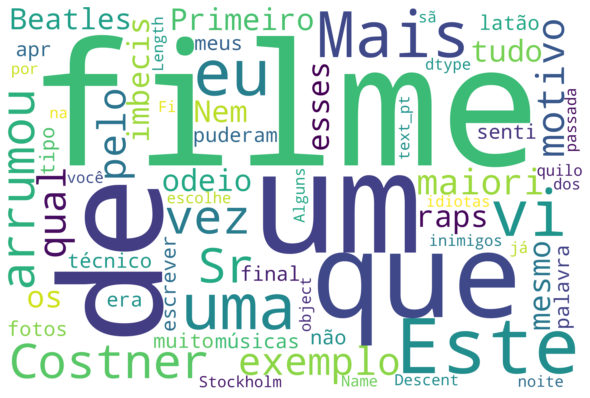

In [8]:
df_neg = df.loc[df['sentiment'] == 'neg']['text_pt']
create_wordcloud(df_neg)

Podemos notar que as nuvens de palavras estão sendo poluídas por palavras que não são tão associadas a um sentimento positivo ou negativo. Por exemplo, as palavras *"filme", "este", "eu", "todo"* nada tem a ver com sentimento e são muito frequentes no dataset. Para o modelo performar bem, precisamos limpar nossos dados!

### **Limpeza de Dados**

Outra etapa importante quando estamos trabalhando com dados textuais é a limpeza dos dados. Sem esse processo, corremos o risco de treinar o modelo com dados sujos e/ou desnecessários, diminuindo sua performance!

**Remoção de stopwords:**

Stopwords são palavras que podem ser consideradas irrelevantes para o conjunto de resultados a ser exibido em uma busca realizada em uma search engine, por exemplo. 

Exemplos: *as, e, os, de, para, com, sem, foi*.

Vamos removê-las do dataset, assim o modelo terá mais chances de identificar padrões nos nossos dados. Para isso, iremos utilizar a biblioteca NLTK:

In [9]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Inicializando variavel com lista de stopwords em Portugues
stopwords_list = stopwords.words('portuguese')
stopwords_list.append('filme') #vamos adicionar "filme" como stopwords
stopwords_list.append('filmes') 

#Removendo stopwords e fazendo stemming das nossas revisões
df['text_pt'] = df['text_pt'].apply(lambda review: ' '.join(word.lower() for word in review.split() if word.lower() not in stopwords_list))
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"vez, sr. costner arrumou tempo necessário. alé...",neg
1,2,This is an example of why the majority of acti...,exemplo motivo maioria ação mesmos. genérico c...,neg
2,3,"First of all I hate those moronic rappers, who...","primeiro tudo odeio raps imbecis, poderiam agi...",neg
3,4,Not even the Beatles could write songs everyon...,beatles puderam escrever músicas todos gostass...,neg
4,5,Brass pictures movies is not a fitting word fo...,"fotos latão palavra apropriada eles, verdade, ...",neg


**Vamos verificar novamente nossa nuvem de palavras:**

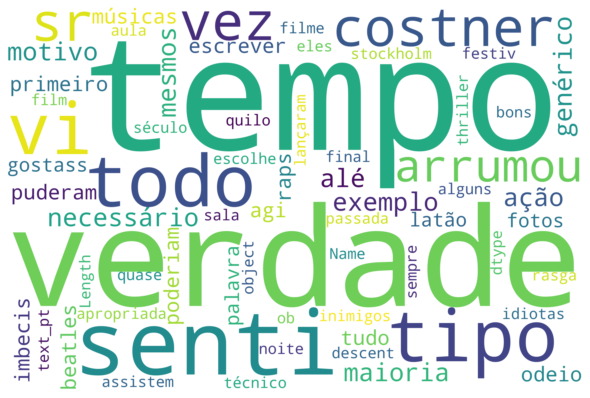

In [10]:
df_neg = df.loc[df['sentiment'] == 'neg']['text_pt']
create_wordcloud(df_neg)

### **Criando nosso modelo de Machine Learning**
Antes de começar a construir nosso modelo, é preciso lembrar que machine learning trabalha melhor com valores numéricas, então vamos modificar a coluna sentimento para 0 = negativo e 1 = positivo:

In [11]:
df.sentiment = df['sentiment'].map({'pos': 1, 'neg': 0})
df.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"vez, sr. costner arrumou tempo necessário. alé...",0
1,2,This is an example of why the majority of acti...,exemplo motivo maioria ação mesmos. genérico c...,0
2,3,"First of all I hate those moronic rappers, who...","primeiro tudo odeio raps imbecis, poderiam agi...",0
3,4,Not even the Beatles could write songs everyon...,beatles puderam escrever músicas todos gostass...,0
4,5,Brass pictures movies is not a fitting word fo...,"fotos latão palavra apropriada eles, verdade, ...",0


**Construindo as features do modelo**

Os modelos de Machine Learning utilizam features para identificar padrões nos dados e generalizar para construção de um modelo automático. Uma feature é uma propriedade mensurável individual ou característica de um fenômeno que está sendo observado ([Wikipédia](https://en.wikipedia.org/wiki/Feature_(machine_learning))). 

Nossas features serão extraídas do próprio texto de cada revisão, e utilizaremos o conceito de n-gram. Esses n-gramas são basicamente combinações de palavras. Por exemplo, na frase: **"Workshop de Dados da PUC"** temos os unigramas: **"workshop", "de", "dados", "da", "puc"**. No caso de bigramas, teriamos combinações de pares de palavras, **"workshop-de**, **"workshop-puc"**, e assim por diante.

Em um modelo de ML, cada n-gram precisa ter uma representação numérica (aqui utilizaremos um contador de frequência de cada palavra). **Vamos transformar nossos dados em unigramas (1-gram) e calcular as frequências de cada um utilizando a função *CountVectorizer* da biblioteca *scikit-learn*:**



In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1, 1)) #definindo que nosso n-gram será de tamanho 1 (unigrama)

#Variável que armazenará o mapeamento de palavra -> frequência
vect.fit(df['text_pt'])

#Printa palavra -> frequência
vect.vocabulary_

{'vez': 124347,
 'sr': 112840,
 'costner': 28938,
 'arrumou': 9623,
 'tempo': 117400,
 'necessário': 84091,
 'além': 5905,
 'terríveis': 117820,
 'seqüências': 108291,
 'resgate': 101871,
 'mar': 76603,
 'quais': 97387,
 'poucas': 94050,
 'simplesmente': 110032,
 'importei': 62487,
 'nenhum': 84347,
 'personagens': 91388,
 'maioria': 75600,
 'fantasmas': 48518,
 'armário': 9138,
 'personagem': 91385,
 'costers': 28935,
 'realizado': 99109,
 'logo': 73732,
 'início': 65795,
 'esquecido': 45488,
 'tarde': 116660,
 'importava': 62482,
 'deveríamos': 36078,
 'importar': 62472,
 'arrogante': 9532,
 'superconfiante': 114912,
 'ashton': 9885,
 'kutcher': 70508,
 'problema': 95399,
 'sai': 105632,
 'garoto': 53643,
 'pensa': 90643,
 'melhor': 78731,
 'qualquer': 97426,
 'outra': 88187,
 'pessoa': 91628,
 'redor': 100098,
 'mostra': 82089,
 'sinais': 110104,
 'desordenado': 35238,
 'único': 129595,
 'obstáculo': 86278,
 'parece': 89288,
 'estar': 45735,
 'vencendo': 123880,
 'finalmente': 50045

In [13]:
# Tabela final, transformando cada palavra em uma feature (coluna) para nosso modelo
text_vect = vect.transform(df['text_pt'])

Uma boa prática na construção de modelos de ML é a separação dos nossos dados em treino e teste. Assim o modelo será treinado na primeira parte e testado na segunda parte do dataset, parte essa que ele não terá "visto" durante o treino. Assim poderemos, ao final da construção, avaliar a real performance do nosso modelo.

**Vamos repartir nosso dataset, sendo 30% para teste**, utilizando a função *train_test_split* da biblioteca *sklearn*. Uma breve explicação das variáveis que serão criadas:
*   ***X_train***: 70% do dataset, apenas com colunas de features.
*   ***y_train***: 70% do dataset, apenas a coluna de sentiment (classe).
*   ***X_test***: 30% do dataset, apenas com colunas de features.
*   ***y_test***: 30% do dataset, apenas a coluna de sentiment (classe).



In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(text_vect, df['sentiment'], test_size = 0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(34621, 129608)
(34621,)
(14838, 129608)
(14838,)


**Treinando nosso modelo**

Vamos utilizar uma [Regressão Logística](https://en.wikipedia.org/wiki/Feature_(machine_learning)) como base do nosso modelo de classificação de sentimentos. A Regressão Logística é uma técnica estaística semelhante a um modelo de Regressão Linear, porém a variável resposta é binária.


In [17]:
from sklearn.linear_model import LogisticRegression

#Inicializando modelo de Regressão Logística
model = LogisticRegression(random_state=42, solver='newton-cg')

#Treinando modelo com nossos dados de treino (features e classe (positiva/negativa))
model = model.fit(X_train, y_train)

Pronto! Nosso modelo já está treinado! Agora vamos avaliar se ele é um bom modelo de ML para classificação de sentimentos. Para isso, vamos utilizar a métrica F1 (f-measure), que consiste em uma média harmônica entre Precisão e Recall (que por sua vez, identificam as taxas de FP, FN, TP, TN).

**Avaliação no dataset de treino:** Como nosso modelo foi treinado nesse dataset, é bem provavel que seu resultado nesse dado seja muito próximo de 100% de assertividade. Essa não é uma avaliação válida, estou mostrando apenas a critério de didática!

In [19]:
from sklearn.metrics import f1_score

y_prediction_train = model.predict(X_train)
f1 = f1_score(y_prediction_train, y_train, average='weighted')
print(f1)

0.9988446325879918


**Avaliação no dataset de teste:** Agora sim! Vamos avaliar nosso modelo em um dataset que ele não "viu" durante o processo de treinamento:

In [20]:
y_prediction_test = model.predict(X_test)
f1 = f1_score(y_prediction_test, y_test, average='weighted')
print(f1)

0.8802400099187409


**Nosso modelo performou muito bem nos dados que ele não conhecia, com uma assertividade de quase 88%! Esse resultado é muito satisfatório, considerando que fizemos poucas etapas de *Feature Engineering* e limpeza de dados.**

Vamos brincar um pouco, escreva uma revisão na célula abaixo e vamos ver se o modelo consegue detectar o sentimento:

In [21]:
revisao_teste = "Duas coisas comprometem esforços como o de Matrix, de nos conduzir a universos virtuais,a a situações em que a vida é sem ser e vice-versa. A primeira é a tonelada de explicações necessárias a nos convencer de que essas coisas são possíveis. Ora, não são. Por isso é filme de ficção científica. E o espectador aceita: ele vive num mundo virtual (computador etc) e percebe que, sendo ficção, pode engolir o filme. A parte disso, a obscura cascata tecnológica convive com uma história que, embora complicada, reencontra velhos conhecidos: a humanidade ameaçada, a ameaça da informática etc. Matrix diverte. Mas está longe de ser a obra-prima que nos venderam."

#Precisamos aplicar as etapas de tratamento de dados e featurização antes de prever a classe do texto:
revisao_teste_sem_stopwords = ' '.join(word.lower() for word in revisao_teste.split() if word.lower() not in stopwords_list)
text_vect_novo = vect.transform([revisao_teste_sem_stopwords])

#Chamando o modelo para prever o sentimento do nosso texto novo
model.predict(text_vect_novo)[0]

0

In [ ]:
revisao_teste2 = ""

#Precisamos aplicar as etapas de tratamento de dados e featurização antes de prever a classe do texto:
revisao_teste_sem_stopwords = ' '.join(word.lower() for word in revisao_teste.split() if word.lower() not in stopwords_list)
text_vect_novo = vect.transform([revisao_teste_sem_stopwords])

#Chamando o modelo para prever o sentimento do nosso texto novo
model.predict(text_vect_novo)[0]